In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/hotel_bookings_cleaned.csv")


In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# data_dic = {}
# for i in range(df.shape[1]):
#     data_dic[df.columns.values[i]] = set(df.iloc[:, i])
# for key in data_dic:
#     print(key, data_dic[key])

## 1.1 'children': use babies column to fill na

In [4]:
len(df[df.children >= 0]) / len(df) # the na rate of 'children'

0.9999664963564787

In [5]:
data_temp = df.loc[:, ['children', 'babies']].dropna(axis=0, how='any')

In [6]:
print((data_temp.children - df.babies).describe()) 

count    119386.000000
mean          0.095941
std           0.408018
min         -10.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
dtype: float64


In [7]:
data_temp.corr()

,children,babies
children,1.00000,0.02403
babies,0.02403,1.00000


In [8]:
print(len(df[df.children.isnull()]))

4


In [9]:
df.loc[df.children.isnull(), 'children'] = df.loc[df.children.isnull(), 'babies'] # 因为差距不大，所以用babies填充children的空缺值

## 1.2undefined factors---undefined rate is acceptable

In [10]:
print('meal:', len(df[df.meal == 'Undefined']) / len(df))
print('market_segment:', len(df[df.market_segment == 'Undefined']) / len(df))
print('distribution_channel:', len(df[df.distribution_channel == 'Undefined']) / len(df))

meal: 0.009791439819080325
market_segment: 1.6751821760616466e-05
distribution_channel: 4.1879554401541165e-05


## 1.3nan factors

In [11]:
print('country:', len(df[df.country.isnull()]) / len(df)) # --- nan rate is acceptable
print('agent:', len(df[df.agent.isnull()]) / len(df)) # --- nan rate is accpetable
print('company:', len(df[df.company.isnull()]) / len(df)) # --- nan rate is not acceptable, delete this factor

country: 0.004087444509590418
agent: 0.13686238378423654
company: 0.943068933746545


## 1.4outlier processing

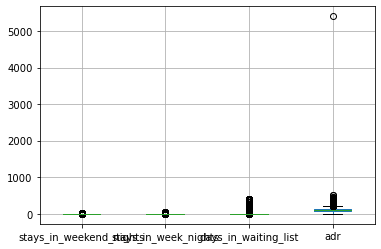

In [12]:
cols = ['stays_in_weekend_nights', 'stays_in_week_nights', 'days_in_waiting_list', 'adr']
df[cols].boxplot()

In [13]:
df[cols].describe()

,stays_in_weekend_nights,stays_in_week_nights,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.927599,2.500302,2.321149,101.831122
std,0.998613,1.908286,17.594721,50.535790
min,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,1.000000,0.000000,69.290000
50%,1.000000,2.000000,0.000000,94.575000
75%,2.000000,3.000000,0.000000,126.000000
max,19.000000,50.000000,391.000000,5400.000000


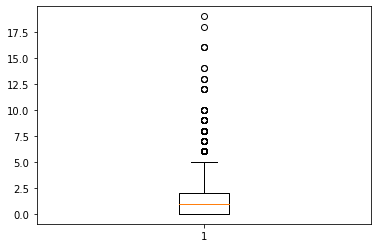

In [14]:
# for stays_in_weekend_nights，stays_in_week_nights，days_in_waiting_list，we think it is reasonable to have somer outliers and do not delete the outliers
plt.boxplot(df.stays_in_weekend_nights)
plt.show()

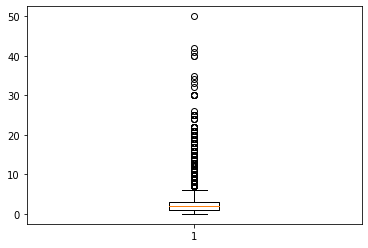

In [15]:
plt.boxplot(df.stays_in_week_nights)
plt.show()

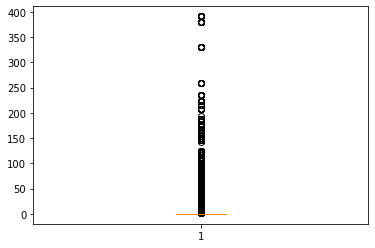

In [16]:
plt.boxplot(df.days_in_waiting_list)
plt.show()

In [17]:
# however, for the adr, we think the price customers paid for the hotel must be a positive price, so we delete the negative adr data.
df[df.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [18]:
df = df[df.adr > 0]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117430 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117430 non-null  object 
 1   is_canceled                     117430 non-null  int64  
 2   lead_time                       117430 non-null  int64  
 3   arrival_date_year               117430 non-null  int64  
 4   arrival_date_month              117430 non-null  object 
 5   arrival_date_week_number        117430 non-null  int64  
 6   arrival_date_day_of_month       117430 non-null  int64  
 7   stays_in_weekend_nights         117430 non-null  int64  
 8   stays_in_week_nights            117430 non-null  int64  
 9   adults                          117430 non-null  int64  
 10  children                        117430 non-null  float64
 11  babies                          117430 non-null  int64  
 12  meal            

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,117430.0,0.374785,0.484069,0.00,0.00,0.0,1.0,1.0
lead_time,117430.0,105.084340,106.907012,0.00,19.00,71.0,162.0,709.0
arrival_date_year,117430.0,2016.160274,0.706565,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,117430.0,27.136779,13.575680,1.00,16.00,27.0,38.0,53.0
arrival_date_day_of_month,117430.0,15.802819,8.783582,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,117430.0,0.936422,0.995760,0.00,0.00,1.0,2.0,19.0
stays_in_week_nights,117430.0,2.521221,1.893742,0.00,1.00,2.0,3.0,50.0
adults,117430.0,1.860632,0.482102,0.00,2.00,2.0,2.0,4.0
children,117430.0,0.104505,0.399690,0.00,0.00,0.0,0.0,10.0
babies,117430.0,0.007869,0.097168,0.00,0.00,0.0,0.0,10.0


## 2.1 Cramer's V for categorical features

In [21]:
df=df.drop('reservation_status',axis=1)

In [22]:
df['is_canceled']=df['is_canceled'].replace([0,1],["no","yes"])

In [23]:
#Extracting categorical feature columns
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))

In [24]:
df_cat=df[cat_cols]

In [25]:
df_cat.columns

Index(['market_segment', 'is_canceled', 'assigned_room_type',
       'distribution_channel', 'meal', 'deposit_type', 'customer_type',
       'hotel', 'arrival_date_month', 'reserved_room_type',
       'reservation_status_date', 'country'],
      dtype='object')

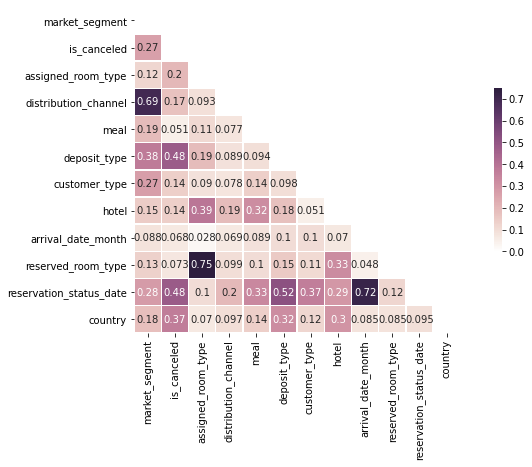

In [26]:
import itertools
import scipy

def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer's V statistic
    """
    
    #chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#Getting the list of columns in the dataframe
cols = list(df_cat.columns.values)

#Creating an empty array to append to as we will go through iteratations to calculate correlations of every combination of variables.
emp_arr = np.zeros((len(cols),len(cols)))

#Iteraiting dataframe using itertools
#itertools.combinations() : Given an array of size n, generate and print all possible combinations of r elements in array.
for col1, col2 in itertools.combinations(cols, 2):
    A, B = df_cat[col1], df_cat[col2]
    idx1, idx2 = cols.index(col1), cols.index(col2)
    conf_mat = pd.crosstab(A,B) 
    #appending results to emp_array
    emp_arr[idx1, idx2] = cramers_corrected_stat(conf_mat.values)
    emp_arr[idx2, idx1] = emp_arr[idx1, idx2]

#creating a correlation matrix
corr = pd.DataFrame(emp_arr, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(12, 6))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## 2.2 Correlation for numerical features

Let's quickly glance at numerical features's correlations. Before that we need to re-convert "is_canceled" attribute to numerical values.

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2015-07-03
5,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2015-07-03
6,Resort Hotel,no,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,2015-07-03


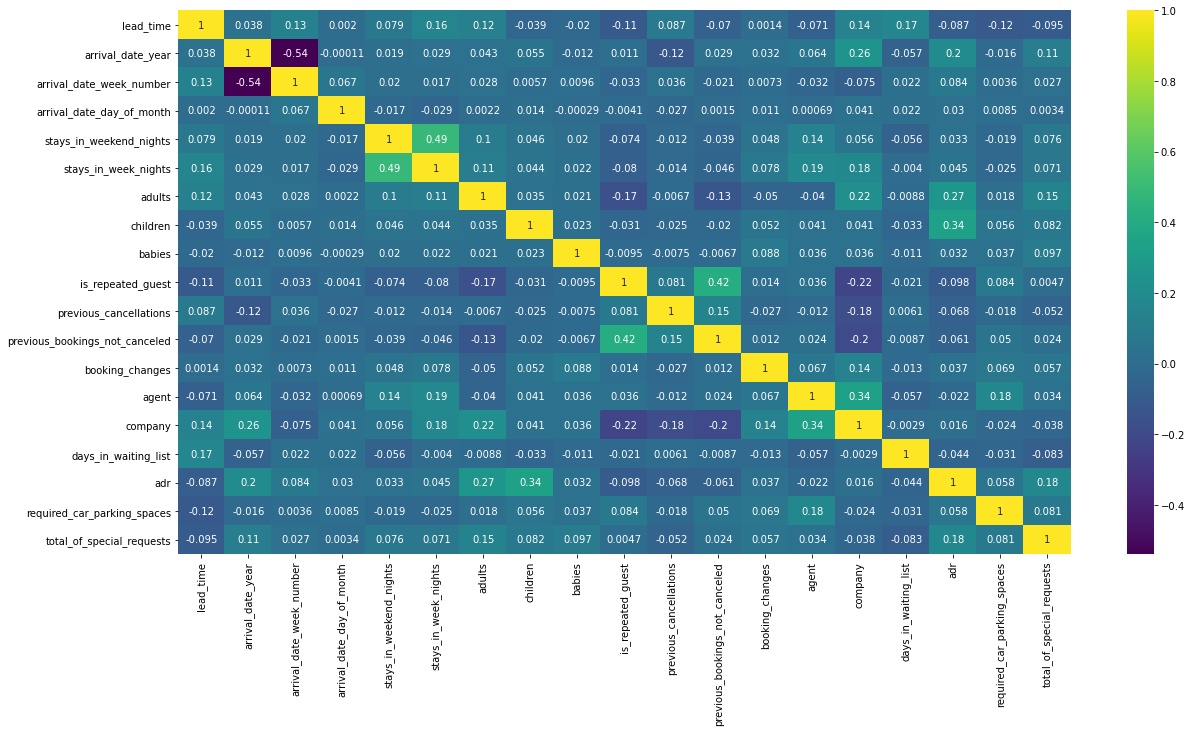

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

The leadtime attribute had the strongest linear correlation with cancellation.

Let's look at the correlation values in a bar graph.

We can more clearly see that both lead_time and total_of_special_requests had the strongest linear correlations with is_canceled target variable.

# 3. Dimensionality reduction : PCA & TSNE

## 3.1 Categorical features only

Now I want to run PCA analysis on categorical features to see if we can really reduce our dataset dimensionality. For PCA to run effectively, let's convert categorical features to numerical ones using Scikit-learn. This requires running integer encoding first follwed by OneHotEncoding.

In [29]:
# Separate features and predicted value
X_cat = df_cat.drop("is_canceled", axis=1)
y_cat = df_cat["is_canceled"].eq('yes').mul(1)

In [30]:
X_cat.head()

,market_segment,assigned_room_type,distribution_channel,meal,deposit_type,customer_type,hotel,arrival_date_month,reserved_room_type,reservation_status_date,country
2,Direct,C,Direct,BB,No Deposit,Transient,Resort Hotel,July,A,2015-07-02,GBR
3,Corporate,A,Corporate,BB,No Deposit,Transient,Resort Hotel,July,A,2015-07-02,GBR
4,Online TA,A,TA/TO,BB,No Deposit,Transient,Resort Hotel,July,A,2015-07-03,GBR
5,Online TA,A,TA/TO,BB,No Deposit,Transient,Resort Hotel,July,A,2015-07-03,GBR
6,Direct,C,Direct,BB,No Deposit,Transient,Resort Hotel,July,C,2015-07-03,PRT


In [31]:
X_cat['country'].fillna("No Country", inplace = True)

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def labelencode(df):
    le = LabelEncoder()
    return df.apply(le.fit_transform)

def onehotencode(df):
    onehot = OneHotEncoder()
    return onehot.fit_transform(df).toarray()

X_2 = labelencode(X_cat)
onehotlabels = onehotencode(X_2)

In [33]:
X_2.head().transpose()

,2,3,4,5,6
market_segment,3,2,6,6,3
assigned_room_type,2,0,0,0,2
distribution_channel,1,0,3,3,1
meal,0,0,0,0,0
deposit_type,0,0,0,0,0
customer_type,2,2,2,2,2
hotel,1,1,1,1,1
arrival_date_month,5,5,5,5,5
reserved_room_type,0,0,0,0,2
reservation_status_date,120,120,121,121,121


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='full')

# Perform PCA on the one-hot encoded labels
X_pca = pca.fit_transform(onehotlabels)

In [36]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.44478212 0.32879096 0.22642693]


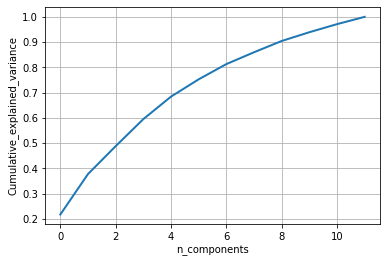

In [37]:
pca = PCA(n_components=len(df_cat.columns))
X_pca = pca.fit_transform(onehotlabels)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

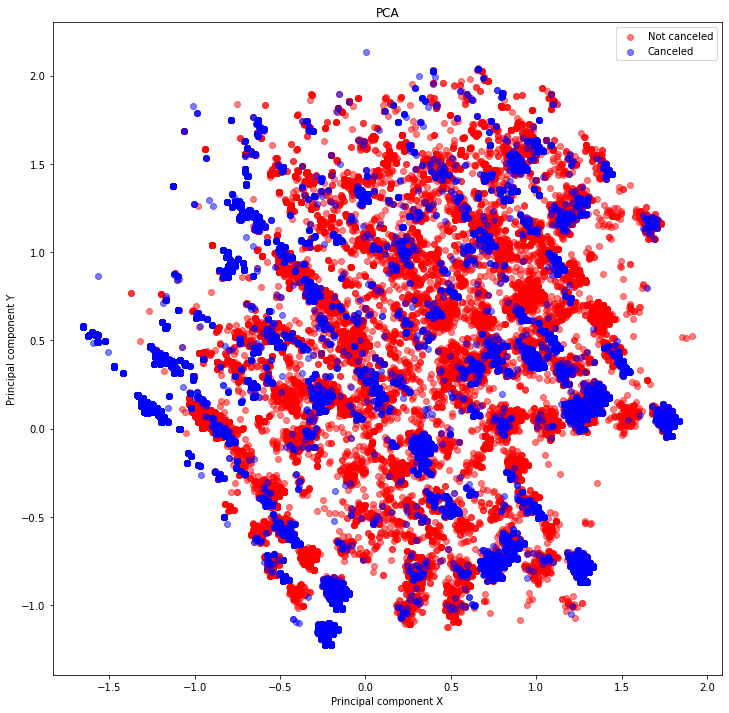

In [38]:
pca = PCA(n_components=len(df_cat.columns))

# Perform PCA on the one-hot encoded labels
X_pca = pca.fit_transform(onehotlabels)

# Rebuild it in its original dimension
X_pca_reconst = pca.inverse_transform(X_pca)

#plotting

plt.figure(figsize=(12,12))

plt.scatter(X_pca[y_cat==0, 0], X_pca[y_cat==0, 1], color='red', alpha=0.5,label='Not canceled')
plt.scatter(X_pca[y_cat==1, 0], X_pca[y_cat==1, 1], color='blue', alpha=0.5,label='Canceled')

plt.title("PCA")
plt.ylabel('Principal component Y')
plt.xlabel('Principal component X')
plt.legend()
plt.show()

## 3.2 Categorical features only

In [39]:
#getting the numerical feature columns one more time
cols = df.columns
num_cols = df._get_numeric_data().columns

#selecting numerical features
df_num=df[num_cols]

#selecting target ('is_canceled' column)
y_num=y_cat

In [40]:
df_num=df_num.fillna(df_num.median())

In [41]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
df_num_standard = StandardScaler().fit_transform(df_num.values)

#replacing the X_num dataframe with the standardized dataframe
df_num[:] = df_num_standard

In [42]:
df_num.head().transpose()

,2,3,4,5,6
lead_time,-0.917477,-0.861354,-0.852000,-0.852000,-0.982955
arrival_date_year,-1.642142,-1.642142,-1.642142,-1.642142,-1.642142
arrival_date_week_number,-0.010075,-0.010075,-0.010075,-0.010075,-0.010075
arrival_date_day_of_month,-1.685290,-1.685290,-1.685290,-1.685290,-1.685290
stays_in_weekend_nights,-0.940413,-0.940413,-0.940413,-0.940413,-0.940413
stays_in_week_nights,-0.803292,-0.803292,-0.275235,-0.275235,-0.275235
adults,-1.785174,-1.785174,0.289086,0.289086,0.289086
children,-0.261466,-0.261466,-0.261466,-0.261466,-0.261466
babies,-0.080978,-0.080978,-0.080978,-0.080978,-0.080978
is_repeated_guest,-0.169325,-0.169325,-0.169325,-0.169325,-0.169325


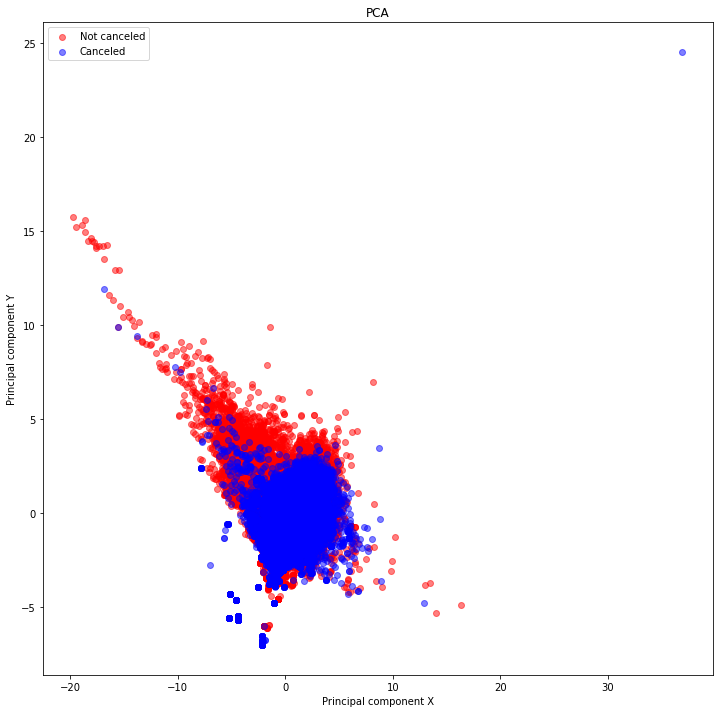

In [43]:
pca = PCA(n_components=len(df_num.columns))

# Perform PCA on the one-hot encoded labels
df_pca_num = pca.fit_transform(df_num)

#plotting

plt.figure(figsize=(12,12))

plt.scatter(df_pca_num[y_num==0, 0], df_pca_num[y_num==0, 1], color='red', alpha=0.5,label='Not canceled')
plt.scatter(df_pca_num[y_num==1, 0], df_pca_num[y_num==1, 1], color='blue', alpha=0.5,label='Canceled')

plt.title("PCA")
plt.ylabel('Principal component Y')
plt.xlabel('Principal component X')
plt.legend()
plt.show()

# 5 数据接口，可直接替换下面代码

In [44]:
#concatenating numerically converted categorical and numerical feature arrays
X_arr=np.concatenate((onehotlabels, df_num_standard), axis=1)
y_arr = df['is_canceled'].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr,y_arr,test_size=0.25,random_state=2019)